In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [93]:
#Importing file1 
df1=pd.read_csv('file1.csv')

In [94]:
#Importing file2 
df2=pd.read_csv('file2.csv')

In [95]:
#Importing file3 
df3=pd.read_csv('file3.csv')

In [96]:
#Merging df1 with df2
df_1=df1.merge(df2, how='outer')

In [97]:
#Merging df1 with df3
df_1=df1.merge(df3, how='outer')

In [98]:
df_1

,Sno,BrandName,Category,ProductType,ProductName,Productcode,Price,Size1,Size2,Size3,Size4,CountryofOrigin,Returntime,Occasion
0,1,BOMBAY BEGUM,Men,Shirts,Spread Collar Shirt with Patch Pocket,467162071014,440,S,M,L,XL,India,10,Regular
1,2,BOMBAY BEGUM,Men,Shirts,Spread Collar Shirt with Patch Pocket,467162071015,440,S,M,L,XL,India,10,Regular
2,3,BOMBAY BEGUM,Men,Shirts,Men Striped Regular Fit Shirt with Short Sleeves,467162071003,440,S,M,L,XL,India,10,Regular
3,4,WUXI,Men,Shirts,Cuban Collar Shirt with Short Sleeves,466823595015,456,S,M,L,XL,India,10,Regular
4,5,THE BEAR HOUSE,Men,Shirts,Men Slim Fit Checked Shirt,461725396005,1073,S,M,L,XL,India,10,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5109,5110,NETPLAY,Men,Tshirts,Regular Fit Polo T-Shirt with Embroidered Logo,441146016046,567,XS,S,M,L,India,10,Regular
5110,5111,GAP,Men,Tshirts,Regular Fit Logo Print Crew-Neck T-Shirt,465700924001,650,S,M,L,XL,India,10,Casual
5111,5112,TROND,Men,Tshirts,Men Typographic Print Oversized Fit T-Shirt,-,604,S,M,L,XL,India,10,Casual
5112,5113,SNITCH,Men,Tshirts,Regular Fit Casual Polo T-Shirt,-,911,S,M,L,XL,India,10,Casual


In [99]:
df_1.shape

(5114, 14)

In [100]:
#I am removing 'Sno' & 'Productcode' columns which I think not required to build the model.
df_1.drop('Sno', axis=1, inplace=True)
df_1.drop('Productcode', axis=1, inplace=True)

In [101]:
df_1.head()

,BrandName,Category,ProductType,ProductName,Price,Size1,Size2,Size3,Size4,CountryofOrigin,Returntime,Occasion
0,BOMBAY BEGUM,Men,Shirts,Spread Collar Shirt with Patch Pocket,440,S,M,L,XL,India,10,Regular
1,BOMBAY BEGUM,Men,Shirts,Spread Collar Shirt with Patch Pocket,440,S,M,L,XL,India,10,Regular
2,BOMBAY BEGUM,Men,Shirts,Men Striped Regular Fit Shirt with Short Sleeves,440,S,M,L,XL,India,10,Regular
3,WUXI,Men,Shirts,Cuban Collar Shirt with Short Sleeves,456,S,M,L,XL,India,10,Regular
4,THE BEAR HOUSE,Men,Shirts,Men Slim Fit Checked Shirt,1073,S,M,L,XL,India,10,Regular


In [102]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5114 entries, 0 to 5113
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   BrandName        5114 non-null   object
 1   Category         5114 non-null   object
 2   ProductType      5114 non-null   object
 3   ProductName      5114 non-null   object
 4   Price            5114 non-null   object
 5   Size1            5083 non-null   object
 6   Size2            5083 non-null   object
 7   Size3            5083 non-null   object
 8   Size4            5083 non-null   object
 9   CountryofOrigin  5114 non-null   object
 10  Returntime       5114 non-null   int64 
 11  Occasion         5114 non-null   object
dtypes: int64(1), object(11)
memory usage: 519.4+ KB


 There are 11 objects and 1 int datatype in this dataset.

In [103]:
df_1.isnull().sum()

BrandName           0
Category            0
ProductType         0
ProductName         0
Price               0
Size1              31
Size2              31
Size3              31
Size4              31
CountryofOrigin     0
Returntime          0
Occasion            0
dtype: int64

In [104]:
#Checking value counts of all the columns
for i in df_1.columns:
    print(df_1[i].value_counts(), ('\n'))

NETPLAY                  375
DNMX                     287
AVAASA MIX N' MATCH      273
TEAMSPIRIT               244
GAP                      133
                        ... 
LEELI PEERI DESIGNER       1
VAAMII                     1
AFSANA                     1
NEWADHIYA ENTERPRISES      1
WEARDO                     1
Name: BrandName, Length: 493, dtype: int64 

Men      3065
Women    2049
Name: Category, dtype: int64 

Tshirts                 1827
Shirts                  1457
Kurta Suit Sets          333
Kurtas                   298
Fusion Wear Sets         182
Dresses                  155
Tops                     128
Trousers & Pants         117
Jeans & Jeggings         109
Dresses & Gowns           77
Leggings                  76
Track Pants               63
Sarees                    31
Co-ord Sets               28
Night&LoungeWearSets      25
Salwars & Churidars       25
Pants                     18
Shorts                    17
Pyjamas & Shorts          15
Sweatshirt & Hoodies      

Replacing '-' value to null values in all the columns if present

In [105]:
df_1['BrandName']=df_1['BrandName'].replace('-', np.nan)

In [106]:
df_1['BrandName']=df_1['BrandName'].replace('-', np.nan)

In [107]:
df_1['Category']=df_1['Category'].replace('-', np.nan)

In [108]:
df_1['ProductType']=df_1['ProductType'].replace('-', np.nan)

In [109]:
df_1['ProductName']=df_1['ProductName'].replace('-', np.nan)

In [110]:
df_1['Price']=df_1['Price'].replace('-', np.nan)

In [111]:
df_1['Size1']=df_1['Size1'].replace('-', np.nan)

In [112]:
df_1['Size2']=df_1['Size2'].replace('-', np.nan)

In [113]:
df_1['Size3']=df_1['Size3'].replace('-', np.nan)

In [114]:
df_1['Size4']=df_1['Size4'].replace('-', np.nan)

In [115]:
df_1['CountryofOrigin']=df_1['CountryofOrigin'].replace('-', np.nan)

In [116]:
df_1['Returntime']=df_1['Returntime'].replace('-', np.nan)

In [117]:
df_1['Occasion']=df_1['Occasion'].replace('-', np.nan)

In [118]:
df_1.isnull().sum()

BrandName            8
Category             0
ProductType          8
ProductName          8
Price              508
Size1               31
Size2               42
Size3               45
Size4               58
CountryofOrigin      0
Returntime           0
Occasion             0
dtype: int64

In [119]:
#I will use the Mode method to fill the null values.
df_1['BrandName']=df_1['BrandName'].fillna(df_1['BrandName'].mode()[0])

In [120]:
df_1['ProductType']=df_1['ProductType'].fillna(df_1['ProductType'].mode()[0])

In [121]:
df_1['ProductName']=df_1['ProductName'].fillna(df_1['ProductName'].mode()[0])

In [122]:
df_1['Price']=df_1['Price'].fillna(df_1['Price'].mode()[0])

In [123]:
df_1['Size1']=df_1['Size1'].fillna(df_1['Size1'].mode()[0])

In [124]:
df_1['Size2']=df_1['Size2'].fillna(df_1['Size2'].mode()[0])

In [125]:
df_1['Size3']=df_1['Size3'].fillna(df_1['Size3'].mode()[0])

In [126]:
df_1['Size4']=df_1['Size4'].fillna(df_1['Size4'].mode()[0])

In [127]:
df_1.isnull().sum()

BrandName          0
Category           0
ProductType        0
ProductName        0
Price              0
Size1              0
Size2              0
Size3              0
Size4              0
CountryofOrigin    0
Returntime         0
Occasion           0
dtype: int64

In [128]:
#Converting object to int datatype of Price column
df_1['Price']=df_1['Price'].astype(str).astype(int)

In [129]:
df_1.describe()

,Price,Returntime
count,5114.000000,5114.000000
mean,840.250293,9.907313
std,948.584559,0.849301
min,102.000000,0.000000
25%,400.000000,10.000000
50%,548.000000,10.000000
75%,899.000000,10.000000
max,10000.000000,10.000000


There is outliers present in 'Price' Column, because Mean value and q2 value is not matching. I will check this by applying distplot

In [130]:
df_1['Price']

0        440
1        440
2        440
3        456
4       1073
        ... 
5109     567
5110     650
5111     604
5112     911
5113     400
Name: Price, Length: 5114, dtype: int32

<Axes: xlabel='Price', ylabel='Density'>

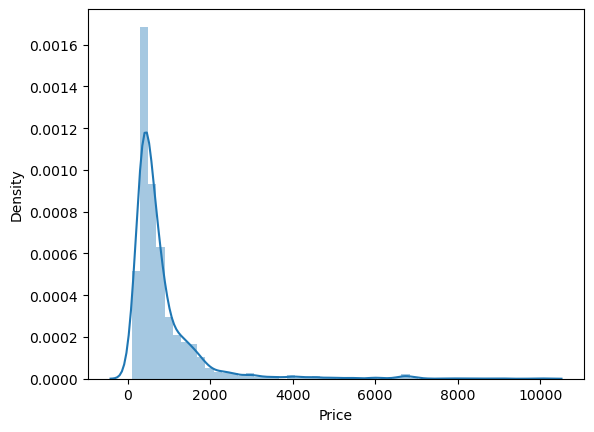

In [131]:
sns.distplot(df_1['Price'])

We can see there are some outliers present in 'Price' colomn.So,I will again check it by using boxplot

<Axes: >

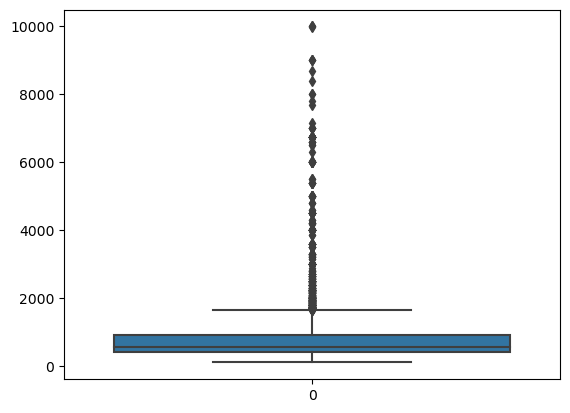

In [72]:
sns.boxplot(df_1['Price'])

In the boxplot also We can see there are outlers present.So, I will try to remove these outlier by using skew method

In [135]:
#remove outlier using skew method
df_1.skew()

Price          4.386052
Returntime   -10.624678
dtype: float64

In [136]:
df_1['Price']=np.cbrt(df_1['Price'])

<Axes: >

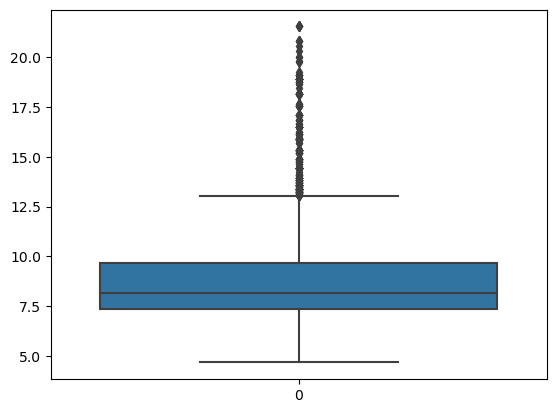

In [138]:
sns.boxplot(df_1['Price'])

Successfully remove outliers from the 'Price' column

In [140]:
#Convertng categorical data to continues data by appling LabelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [142]:
for i in df_1[list(df_1.select_dtypes(include='object'))]:
    data=le.fit_transform(df_1[i])
    df_1[i]=data

In [143]:
df_1.head()

,BrandName,Category,ProductType,ProductName,Price,Size1,Size2,Size3,Size4,CountryofOrigin,Returntime,Occasion
0,63,0,23,1784,7.605905,5,5,4,7,0,10,1
1,63,0,23,1784,7.605905,5,5,4,7,0,10,1
2,63,0,23,1109,7.605905,5,5,4,7,0,10,1
3,478,0,23,206,7.697002,5,5,4,7,0,10,1
4,429,0,23,1048,10.237641,5,5,4,7,0,10,1


In [145]:
#'ContryofOrigin' column has only one value. So, I will drop this column. I think this column would not contribute to model building.
df_1=df_1.drop('CountryofOrigin', axis=1)

In [146]:
df_1.head()

,BrandName,Category,ProductType,ProductName,Price,Size1,Size2,Size3,Size4,Returntime,Occasion
0,63,0,23,1784,7.605905,5,5,4,7,10,1
1,63,0,23,1784,7.605905,5,5,4,7,10,1
2,63,0,23,1109,7.605905,5,5,4,7,10,1
3,478,0,23,206,7.697002,5,5,4,7,10,1
4,429,0,23,1048,10.237641,5,5,4,7,10,1


In [148]:
#Now I am checking if there is any multicollinearity problem in columns by using VIF technique.
x=df_1.drop('Price', axis=1)

In [151]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
scaler=StandardScaler()

In [152]:
x_scaled=scaler.fit_transform(x)

In [153]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif['Feature']=x.columns
vif

,vif,Feature
0,1.076067,BrandName
1,2.214815,Category
2,2.582742,ProductType
3,1.062749,ProductName
4,12.765986,Size1
5,7.775363,Size2
6,1.257868,Size3
7,4.163491,Size4
8,1.014278,Returntime
9,2.209512,Occasion


'Size1' column has highest vif value. Now, I will try to check in heatmap also to confirm multicollinearity issue. 

In [154]:
#Now I will check Multicollinearity issue in independend variables
df_corr=df_1.corr().abs()

<Axes: >

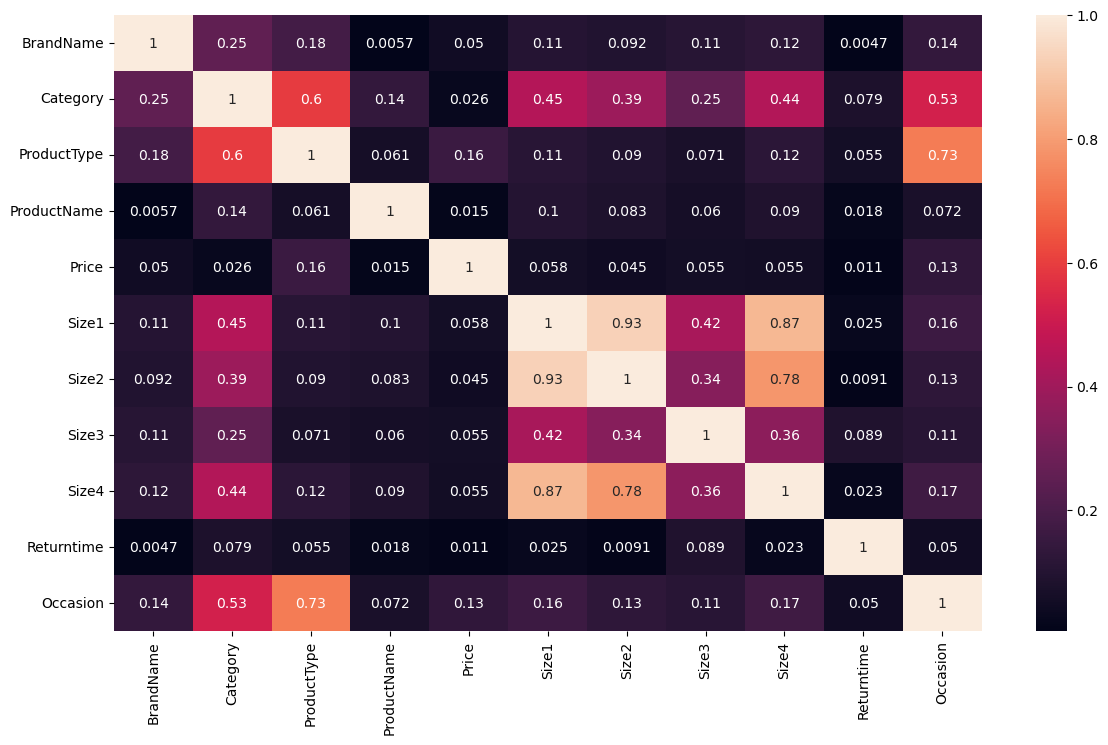

In [155]:
plt.figure(figsize=(14,8))
sns.heatmap(df_corr, annot=True, annot_kws={'size':10})

In heatmap also I can see 'Size1' column has highest value.So, I will drop this column

In [156]:
df_1=df_1.drop('Size1', axis=1)

In [157]:
df_1.head()

,BrandName,Category,ProductType,ProductName,Price,Size2,Size3,Size4,Returntime,Occasion
0,63,0,23,1784,7.605905,5,4,7,10,1
1,63,0,23,1784,7.605905,5,4,7,10,1
2,63,0,23,1109,7.605905,5,4,7,10,1
3,478,0,23,206,7.697002,5,4,7,10,1
4,429,0,23,1048,10.237641,5,4,7,10,1


# Now I have completed my EDA activity. Now I am ready to build the model as per the problem statement. 

In [159]:
x=df_1.drop('Price', axis=1)
y=df_1.Price

In [160]:
x_scaled=scaler.fit_transform(x)

In [161]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [162]:
lr=LinearRegression()
rfr=RandomForestRegressor()
dtr=DecisionTreeRegressor()
knn=KNN()
ls=Lasso()
rd=Ridge()
etr=ExtraTreesRegressor()
svr=SVR()
gdr=GradientBoostingRegressor()

In [163]:
mdl=[lr,rfr,dtr,knn,ls,rd,etr,svr,gdr]

In [164]:
for i in range(1, 200):
    x_train, x_test, y_train, y_test=tts(x_scaled, y, test_size=0.25, random_state=i)
    for i in mdl:
        i.fit(x_train, y_train)
        y_pred=i.predict(x_train)
        tacc=r2_score(y_train, y_pred)
        print('r2_score of Train Data:',tacc*100)
        pred=i.predict(x_test)
        acc=r2_score(y_test, pred)
        print('r2_score of Test Data:',acc*100)
        print('Model Name: ',i)
        print('\n')
    break

r2_score of Train Data: 5.488589900920083
r2_score of Test Data: 5.241040578887013
Model Name:  LinearRegression()


r2_score of Train Data: 91.39890049945988
r2_score of Test Data: 50.24924662337169
Model Name:  RandomForestRegressor()


r2_score of Train Data: 97.14505352127794
r2_score of Test Data: 19.933680343465245
Model Name:  DecisionTreeRegressor()


r2_score of Train Data: 47.331313377185516
r2_score of Test Data: 25.410508989862336
Model Name:  KNeighborsRegressor()


r2_score of Train Data: 0.0
r2_score of Test Data: -0.00014500676048800898
Model Name:  Lasso()


r2_score of Train Data: 5.48858798813977
r2_score of Test Data: 5.241239638879048
Model Name:  Ridge()


r2_score of Train Data: 97.14505352127794
r2_score of Test Data: 41.56237723623358
Model Name:  ExtraTreesRegressor()


r2_score of Train Data: 3.3459383322169023
r2_score of Test Data: 2.939036803223982
Model Name:  SVR()


r2_score of Train Data: 51.53922176414455
r2_score of Test Data: 48.61626505749267
Model

As per above r2_score I think RandomForestRegressor has given best score.

So, I will use this model to check CV socre.

In [201]:
from sklearn.model_selection import cross_val_score

In [167]:
ypred=gdr.predict(x_test)

In [168]:
print("Difference between r2 score & Cross Validation Score is", r2_score(y_test,ypred)-(score.mean()))

Difference between r2 score & Cross Validation Score is 0.13378444955216723


CV score and GradientBoostingRegreessor has not much differences.
Now I am try to hypertuing the parameter of GradientBoostingRegressor model.

In [170]:
from sklearn.model_selection import GridSearchCV

In [188]:
score=cross_val_score(rfr, x_scaled,y)

In [189]:
ypred=rfr.predict(x_test)

In [190]:
print("Difference between r2 score & Cross Validation Score is", r2_score(y_test,ypred)-(score.mean()))

Difference between r2 score & Cross Validation Score is 0.15789265650477124


CV score and RandomForestRegressor score has not much differences. Now I am try to hypertuing the parameter of RandomForestRegressor model.

In [194]:
param={'n_estimators': [5,10,15],
       'criterion':['poisson', 'squared_error', 'absolute_error'],
       'max_features':['sqrt', 'log2'],
       'max_depth':[3,6,9],
       'max_leaf_nodes': [3, 6, 9]}

In [195]:
grd=GridSearchCV(RandomForestRegressor(), param_grid=param)

In [196]:
grd.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['poisson', 'squared_error',
                                       'absolute_error'],
                         'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2'],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [5, 10, 15]})

In [197]:
grd.best_params_

{'criterion': 'squared_error',
 'max_depth': 9,
 'max_features': 'sqrt',
 'max_leaf_nodes': 9,
 'n_estimators': 15}

In [198]:
price_predict_model=RandomForestRegressor(criterion='squared_error', n_estimators=15, max_features='sqrt', max_depth=9,max_leaf_nodes=9)

In [199]:
price_predict_model.fit(x_train, y_train)
pred=price_predict_model.predict(x_test)
acc=r2_score(y_test, pred)*100

In [202]:
print('After Applying GridSearcchCV the final score of RandomForestRegressor model is: ', acc)

After Applying GridSearcchCV the final score of RandomForestRegressor model is:  20.1974608747326


## Now, I am going to predict the Occasion as per the problem statement

In [204]:
#Seperating features and label
x=df_1.drop('Occasion', axis=1)
y=df_1.Occasion

In [205]:
x_scaled=scaler.fit_transform(x)

In [206]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [211]:
etc=ExtraTreesClassifier()
rfc=RandomForestClassifier()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
lr=LogisticRegression()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()
bc=BaggingClassifier()
svc=SVC()

In [212]:
mdl=[rfc,etc,lr,knn,dtc,gbc,abc,bc,svc]

In [213]:
for i in range(1, 200):
    x_train, x_test, y_train, y_test=train_test_split(x_scaled, y, test_size=0.30, random_state=i)
    for i in mdl:
        i.fit(x_train, y_train)
        y_pred=i.predict(x_train)
        tacc=accuracy_score(y_train, y_pred)
        print('Accuracy Score of Train Data:',tacc*100)
        pred=i.predict(x_test)
        acc=accuracy_score(y_test, pred)
        print('Accuracy Score of Test Data:',acc*100)
        print('Model Name: ',i)
        print('\n')
    break

Accuracy Score of Train Data: 97.93238334730373
Accuracy Score of Test Data: 82.73615635179154
Model Name:  RandomForestClassifier()


Accuracy Score of Train Data: 97.93238334730373
Accuracy Score of Test Data: 82.60586319218241
Model Name:  ExtraTreesClassifier()


Accuracy Score of Train Data: 78.87678122380554
Accuracy Score of Test Data: 76.93811074918567
Model Name:  LogisticRegression()


Accuracy Score of Train Data: 86.36490639843531
Accuracy Score of Test Data: 78.0456026058632
Model Name:  KNeighborsClassifier()


Accuracy Score of Train Data: 97.93238334730373
Accuracy Score of Test Data: 82.47557003257329
Model Name:  DecisionTreeClassifier()


Accuracy Score of Train Data: 89.85750209555742
Accuracy Score of Test Data: 83.97394136807817
Model Name:  GradientBoostingClassifier()


Accuracy Score of Train Data: 58.060910868957805
Accuracy Score of Test Data: 56.67752442996743
Model Name:  AdaBoostClassifier()


Accuracy Score of Train Data: 97.17798267672534
Accuracy Score 

Almost all models have given good scores except AdaBoostClassifier. So, I will check the CV scores of all the best models.

In [214]:
models={'RandomForestClassifier':rfc,'ExtraTreesClassifier':etc,'LogisticRegression':lr,'KNeighborsClassifier':knn,'DecisionTreeClassifier':dtc,'GradientBoostingClassifier':gbc,'SVC':svc,'BaggingClassifier':bc}

In [216]:
#Cheking CV Score by using for loop on all models.
for i in mdl:
    score=cross_val_score(i, x_scaled,y)
    print('Model Name is :', i)
    print('Score: ',score)
    print('Score Mean: ',score.mean())
    for name, model in models.items():
        model.fit(x_train, y_train)
        ypred=model.predict(x_test)
    print("diffrent Between Accuracy Score and CV score is :" ,accuracy_score(y_test, ypred)-(score.mean()))
    print("\n")

Model Name is : RandomForestClassifier()
Score:  [0.97262952 0.94525904 0.8230694  0.58944282 0.59295499]
Score Mean:  0.7846711544457899
diffrent Between Accuracy Score and CV score is : 0.05832558822521983


Model Name is : ExtraTreesClassifier()
Score:  [0.9540567  0.93450635 0.83773216 0.59237537 0.60763209]
Score Mean:  0.7852605341337113
diffrent Between Accuracy Score and CV score is : 0.052524482152933594


Model Name is : LogisticRegression()
Score:  [0.87878788 0.85043988 0.72238514 0.55620723 0.57729941]
Score Mean:  0.7170239099536493
diffrent Between Accuracy Score and CV score is : 0.11945817473690445


Model Name is : KNeighborsClassifier()
Score:  [0.86510264 0.85826002 0.78201369 0.58651026 0.58023483]
Score Mean:  0.7344242883350263
diffrent Between Accuracy Score and CV score is : 0.09945193316334511


Model Name is : DecisionTreeClassifier()
Score:  [0.98631476 0.9540567  0.83186706 0.59530792 0.62426614]
Score Mean:  0.7983625153753302
diffrent Between Accuracy Sco

DecisionTreeClassifier has given the best score better than other models. Other models are also given good scores, but the highest score is given by DecisionTreeClassifier. So, Now I will try to tunning the parameters of this model and find the best score.

In [227]:
param={'criterion':['entropy', 'log_loss', 'gini'],
      'max_depth':[10,15,20],
      'min_samples_split':[10,11,12],
      'min_samples_leaf':[5,6,7]}

In [228]:
grd=GridSearchCV(dtc, param_grid=param)

In [229]:
grd.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'log_loss', 'gini'],
                         'max_depth': [10, 15, 20],
                         'min_samples_leaf': [5, 6, 7],
                         'min_samples_split': [10, 11, 12]})

In [230]:
grd.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 6,
 'min_samples_split': 10}

In [231]:
occasion_predict_model=DecisionTreeClassifier(criterion='entropy', min_samples_split=10, max_depth=10,min_samples_leaf=6)

In [233]:
occasion_predict_model.fit(x_train, y_train)
pred=occasion_predict_model.predict(x_test)
acc=accuracy_score(y_test, pred)*100

In [234]:
print('After Applying GridSearcchCV the final score of DecisionTreeClassifier model is: ', acc)

After Applying GridSearcchCV the final score of DecisionTreeClassifier model is:  83.06188925081433
